<a href="https://colab.research.google.com/github/KAMYAVERMA/International-Space-Challenge/blob/main/ISC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISULAIZING AND EXAMINING DATA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("SolarPrediction.csv")



In [ ]:
# take a look at the dataset
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1.475229e+09,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1.475229e+09,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,1.475229e+09,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,1.475228e+09,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,1.475228e+09,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [ ]:
# summarise the data
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,1.284900e+04,12849.000000,12849.000000,12849.000000,12849.000000,12849.00000,12849.000000
mean,1.475352e+09,235.105267,52.989182,30.435906,76.654993,129.88658,5.781463
std,1.687865e+06,344.179379,6.098707,0.035423,24.595725,79.28027,2.860760
min,1.472724e+09,1.130000,41.000000,30.340000,8.000000,0.09000,0.000000
25%,1.473863e+09,1.240000,48.000000,30.410000,59.000000,68.03000,3.370000
50%,1.474920e+09,3.410000,52.000000,30.440000,85.000000,135.84000,5.620000
75%,1.477028e+09,415.290000,58.000000,30.460000,98.000000,171.01000,7.870000
max,1.477994e+09,1601.260000,71.000000,30.540000,103.000000,359.95000,20.250000


In [ ]:
cdf = df[['Temperature','Radiation','Pressure']]
cdf.head(9)

,Temperature,Radiation,Pressure
0,48.0,1.21,30.46
1,48.0,1.21,30.46
2,48.0,1.23,30.46
3,48.0,1.21,30.46
4,48.0,1.17,30.46
5,48.0,1.21,30.46
6,49.0,1.20,30.46
7,49.0,1.24,30.46
8,49.0,1.23,30.46


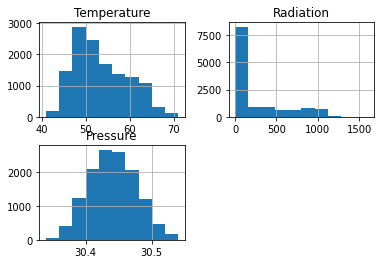

In [ ]:
viz = cdf[['Temperature','Radiation','Pressure']]
viz.hist()
plt.show()

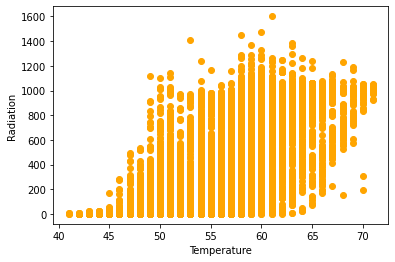

In [ ]:
#plotting histogram between temperature and radiation
plt.scatter(cdf.Temperature, cdf.Radiation, color='orange')
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.show()

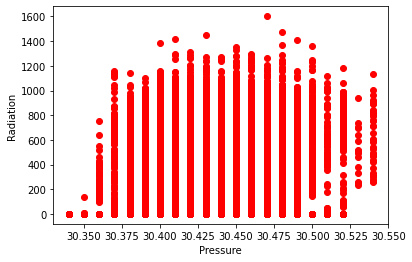

In [ ]:
#plotting histogram between temperature and radiation
plt.scatter(cdf.Pressure, cdf.Radiation, color='red')
plt.xlabel("Pressure")
plt.ylabel("Radiation")
plt.show()

**MODEL** **BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#Independent variable
X = df[['Temperature', 'Pressure','Humidity', 'WindDirection(Degrees)', 'Speed']]
 #dependent variable
y = df['Radiation']
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
#model building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
l = LinearRegression()
l.fit(X_train,y_train)
print(l.intercept_)

27928.842466472735


In [ ]:
 predictions = l.predict(X_test)

In [ ]:
sse = np.sum((predictions - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)

In [ ]:
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.5700852007283191


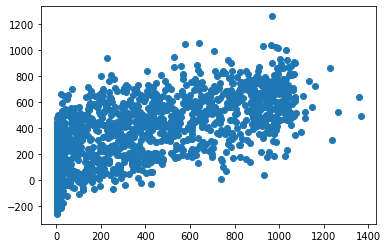

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


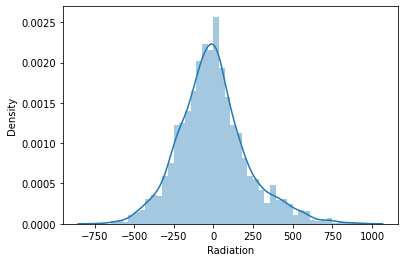

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
f = plt.figure(figsize=(14,5))

<Figure size 1008x360 with 0 Axes>

In [ ]:
a = f.add_subplot(121)

In [ ]:
# Check for Residual normality & mean
ax = f.add_subplot(122)

In [ ]:
sns.distplot((y_test - predictions),ax=ax,color='b')


In [ ]:
ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')

In [ ]:
ax.set_title('Check for Residual normality & mean: \n Residual error')


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 165.31144498540786
MSE: 48326.93876688425
RMSE: 219.83388903188754
